<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2025
</center></h1>

<h2><center>Assignment 2 – PS8 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
     <li><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum credits</div></li>    
    <li><div class="alert-warning">Submissions done via means other than Taxila will strictly be NOT graded.</div></li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 55</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>ANITHA R</td>
    <td>2024DA04165</td>
  </tr>
  <tr>
    <td>MOHAMMED MUDASSIRULLAH SHERIFF</td>
    <td>2024DA04200</td>
  </tr>
  <tr>
    <td>SAI POOJA M S</td>
    <td>2024DA04202</td>
  </tr>
   <tr>
    <td>VINOTH TS</td>
    <td>2024DA04220</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>Identify the features which have high impact on attrition</h4>

##  Download and Prep the Data: 1 Mark

Import the modules needed

In [62]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os


Download the dataset and read it into a dataframe

In [41]:
dataset = 'dvi-a2-ps8-data.csv'
print("Current working directory:", os.getcwd())
df = pd.read_csv(dataset)

Current working directory: C:\Users\msf12\OneDrive - Sky\Documents\BITS\Semester 2\DVI\DVI_ASSIGNMENT2_PS8\DVI_ASSIGNMENT2_PS8\DVI_ASSIGNMENT2_PS8


First five items in the dataset.

In [42]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,80,6,2,2,2


Find out how many entries there are in the dataset.

In [43]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 1470, Number of columns: 23


Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

a. Clean up Data

In [44]:
# Check for data types
df.info()
print("\n")

#Check for null/missing values
missing_values = df.isna().sum()
if missing_values.any():
    print("Missing values in each column:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")
print("\n")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
else:
    print("No duplicate rows found in the dataset.")
print("\n")

# Check for unique values in each column
print("Unique values for categorical columns:")                   
for col in df.select_dtypes(include=['object', 'category']):
    print(f"Column: {col}, No:of Unique valaues: {df[col].nunique()}, Values: {df[col].unique()}")

# print("Unique values in each column:")
# for col, data in categorical_unique_values.items():
#     print(f"{col} - {data[0]}: {data[2]} unique values" if data[1] < 6 else f"{col} - {data[0]}: {data[1]} unique values (too many to display)")

print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   Attrition             1470 non-null   object
 2   BusinessTravel        1470 non-null   object
 3   DailyRate             1470 non-null   int64 
 4   Department            1470 non-null   object
 5   DistanceFromHome      1470 non-null   int64 
 6   Education             1470 non-null   object
 7   EducationField        1470 non-null   object
 8   EmployeeNumber        1470 non-null   int64 
 9   Gender                1470 non-null   object
 10  JobRole               1470 non-null   object
 11  JobSatisfaction       1470 non-null   object
 12  MaritalStatus         1470 non-null   object
 13  MonthlyIncome         1470 non-null   int64 
 14  NumCompaniesWorked    1470 non-null   int64 
 15  OverTime              1470 non-null   

<h4>Summary of clean up:</h4>
    The output shows that there are no missing values and no duplicates so no imputation is needed.

b. Remove Unnecessary Columns

In [45]:

df_cleaned = df.drop(columns=['EmployeeNumber', 'StandardHours'])
print("Columns 'EmployeeNumber' and 'StandardHours' have been removed.")
# Outlier detection using IQR
# for column in df.select_dtypes(include=['float64', 'int64']).columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
#     if not outliers.empty:
#         print(f"{column}: {len(outliers.tolist())} \n Lower bound: {lower_bound} \n Upper bound: {upper_bound} \n outliers: {', '.join(map(str, sorted(set(outliers.tolist()))))}")



Columns 'EmployeeNumber' and 'StandardHours' have been removed.


Reasons for removal:
- EmployeeNumber: This is just a unique identifier for each employee and has no predictive power or analytical value.
- StandardHours: This column has a single, constant value (80) for all employees, which means it has zero variance and provides no information for analysis.

c. Show the data

In [46]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,6,2,2,2


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Find the correlation between all numerical features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

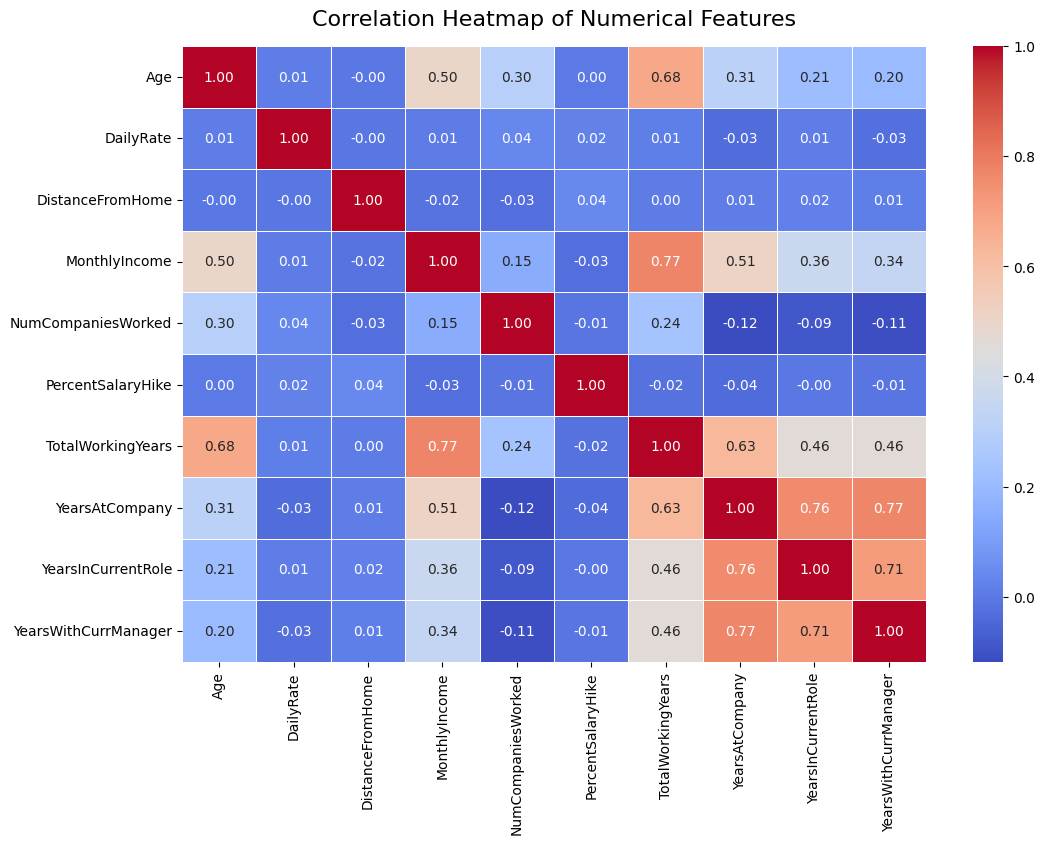

In [47]:
# Compute correlation matrix only for numerical columns
corr_matrix = df_cleaned.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


<section>
<h4>Summary of Findings</h4>
<ul>
  <li>The heatmap clearly shows how the numerical features are related to each other.</li>
  <li>Darker shades (closer to +1 or -1) indicate stronger positive or negative relationships, while lighter shades (closer to 0) show weak or no correlation.</li>
  <li>This helps us quickly spot which features move together and which ones are fairly independent.</li>
</ul>
<h4>Why I chose a Heatmap ?</h4>
<ul>
  <li>A correlation matrix has a lot of numbers, and a heatmap makes it much easier to see patterns at a glance.</li>
  <li>The color gradient highlights strong and weak relationships instantly, without needing to read every single value.</li>
</ul>

<h4>Pre-attentive Attributes Used</h4>
<ul>
  <li>Color intensity : Strong correlations stand out with deeper colors.</li>
  <li>Spatial arrangement (position): The grid layout makes it simple to compare one feature with another.</li>
</ul>

<h4>Gestalt Principles Applied</h4>
<ul>
  <li>Similarity: Cells with the same color shade are seen as belonging together, which helps identify groups of correlated features.</li>
  <li>Proximity: Since related features are positioned next to each other in the grid, our eyes naturally connect them.</li>
</ul>
</section>

### Question 2
<h4>Find the distribution of age in the dataset. Identify which age group is most prone to attrition.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


C:\Users\msf12\AppData\Local\Temp\ipykernel_19720\1754638573.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age = df_cleaned.groupby('AgeGroup')['Attrition'].apply(lambda x: (x=="Yes").mean())


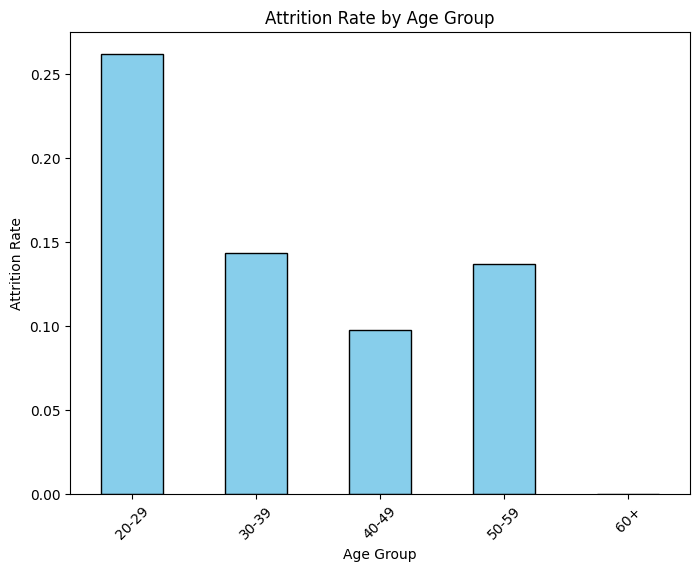

The age group most prone to attrition is: 20-29


In [48]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Calculate attrition rate by age group
attrition_by_age = df_cleaned.groupby('AgeGroup')['Attrition'].apply(lambda x: (x=="Yes").mean())

# Plot distribution
plt.figure(figsize=(8,6))
attrition_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Attrition Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

# Print most attrition-prone group
most_prone = attrition_by_age.idxmax()
print(f"The age group most prone to attrition is: {most_prone}")

<section>
<h4>Findings from the Visual</h4>
<ul>
    <li>The 20–29 age group shows the highest attrition rate.</li>
    <li>Attrition decreases in older groups, suggesting younger employees are more likely to leave compared to mid-career or senior employees.</li>
</ul>

<h4>The reason for selecting the chart type</h4>
<ul>
    <li>A bar chart was chosen because it clearly shows comparisons of attrition rates across discrete age groups.</li>
</ul>

<h4>Pre-attentive attributes used</h4>
<ul>
    <li>Length (bar height): The varying bar heights immediately draw attention to differences in attrition rates.</li>
    <li>Color (sky blue fill): Uniform coloring distinguishes the bars from the background, keeping focus on magnitude rather than categories.</li>
</ul>

<h4>Gestalt Principles Used</h4>
<ul>        
    <li>Proximity: Bars positioned close together along the x-axis are perceived as part of the same category group (age distribution).</li>
    <li>Similarity: All bars have the same shape and color, signaling that they belong to the same type of data (attrition rate).</li>
</ul>
</section>

### Question 3
<h4>Analyse the departmentwise attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


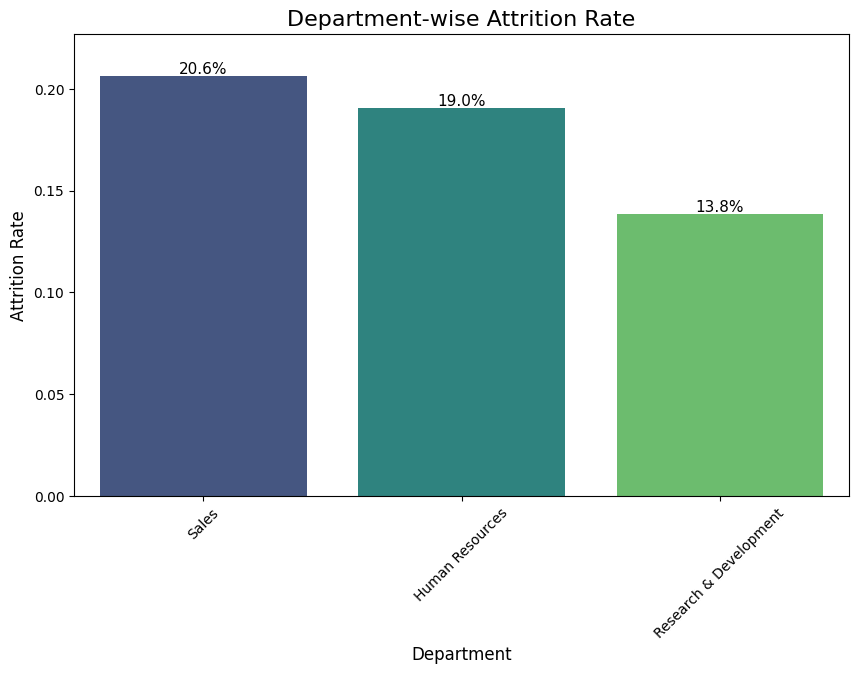

In [49]:
df_attritin_rate = df_cleaned.copy()
df_attritin_rate['Attrition_numeric'] = df_attritin_rate['Attrition'].map({'Yes': 1, 'No': 0})

dept_attrition = df_attritin_rate.groupby('Department')['Attrition_numeric'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Department', y='Attrition_numeric', data=dept_attrition, palette='viridis', hue='Department', legend=False)
plt.title('Department-wise Attrition Rate', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.ylim(0, dept_attrition['Attrition_numeric'].max() * 1.1)
plt.show()

<section>
<h4>Findings from the visual.</h4>
<ul>
   <li>The bar chart shows that the Sales department has the highest attrition rate at 20.6%.</li> 
   <li>It is followed by the Human Resources department at 19.0%, and the Research & Development department has the lowest attrition rate at 13.8%.</li> 
   <li>This suggests that factors specific to the sales environment may be contributing to higher employee turnover.</li>
</ul>

<h4>The reason for selecting the chart type.</h4>
<ul>
   <li>A bar chart is the most effective visual for comparing a numerical value (attrition rate) across different discrete categories (departments).</li> 
   <li>The length of the bars provides a clear and immediate comparison of the rates, making it easy to identify which department has the highest and lowest attrition.</li>
</ul>

<h4>Pre-attentive attributes used (atleast 2)</h4>
<ul>
<li>Length: The different lengths of the bars are instantly perceived, allowing for a quick comparison of attrition rates without needing to read the exact numbers.</li>
<li>Color: While the colors here are primarily for aesthetic appeal, the distinct hue for each bar helps in segregating the departments visually.</li>
</ul>

<h4>Gestalt principles used (atleast 2).</h4>
<ul>
<li>Proximity: The bars are grouped closely together, which helps us perceive them as a single, related set of data for comparison.</li>
<li>Similarity: The bars are all the same width and orientation, which makes them easy to compare. This similarity allows us to focus solely on the difference in their lengths.</li>
</ul>
</section>

### Question 4
<h4>Identify the top 5 job roles with highest attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


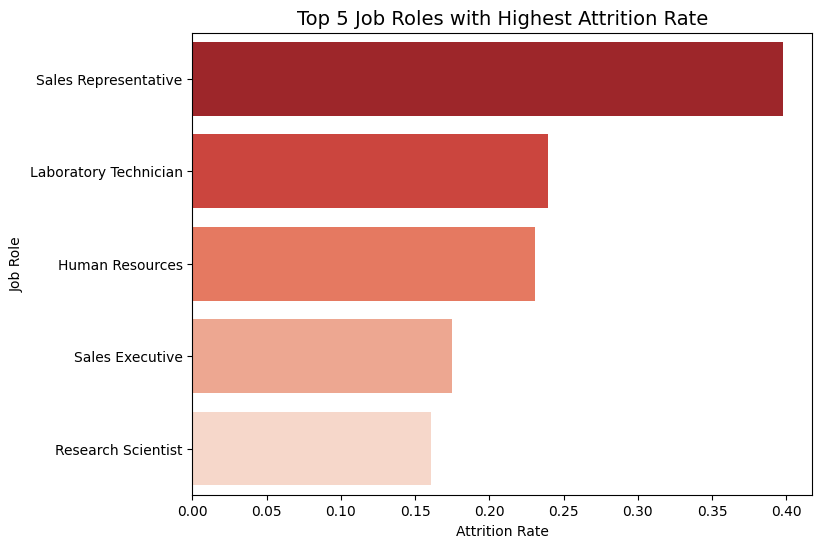

In [50]:
# Calculate attrition rate per job role
attrition_rate = (
    df_cleaned.groupby("JobRole")["Attrition"]
    .apply(lambda x: (x == "Yes").mean())
    .sort_values(ascending=False)
    .head(5)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=attrition_rate.values,
    y=attrition_rate.index,
    hue=attrition_rate.index,   # assign hue to avoid warning
    palette="Reds_r",
    legend=False
)

plt.title("Top 5 Job Roles with Highest Attrition Rate", fontsize=14)
plt.xlabel("Attrition Rate")
plt.ylabel("Job Role")
plt.show()

<section>
  <h4>Findings from the Visual</h4>
  <ul>
    <li>The bar chart highlights the top five job roles with the highest attrition rates.</li>
    <li>Some roles show noticeably higher attrition than others, indicating where
   targeted retention efforts(e.g., career paths, workload balancing, incentives) may be needed.</li>
    <li>This helps HR prioritize strategies for the most vulnerable roles.</li>
  </ul>

  <h4>Why I Chose this Chart Type</h4>
  <ul>
    <li>A horizontal bar chart is well-suited for comparing percentages across categories.</li>
    <li>It supports easy ranking, and longer job role names remain readable on the y-axis.</li>
  </ul>
  

  <h4>Pre-attentive Attributes Used</h4>
  <ul>
    <li>Length (bar size): Immediately communicates which roles have higher attrition.</li>
    <li>Color intensity: Darker shades draw attention to higher rates.</li>
  </ul>

  <h4>Gestalt Principles Applied</h4>
  <ul>
    <li>Similarity: Consistent bar shapes/styles make differences in length stand out.</li>
    <li>Proximity:Closely placed bars enable quick, side-by-side comparison.</li>
  </ul>
</section>

### Question 5
<h3> Multivariate analysis
<h4>Identify the top 2 highly correlated features.Analyse(use a single visual), how they relate to "number of years in the company" and their combined effect on attrition.<br>
    
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

Correlation of features with YearsAtCompany:
YearsAtCompany          1.000000
YearsWithCurrManager    0.769212
YearsInCurrentRole      0.758754
TotalWorkingYears       0.628133
MonthlyIncome           0.514285
Age                     0.311309
DistanceFromHome        0.009508
DailyRate              -0.034055
PercentSalaryHike      -0.035991
NumCompaniesWorked     -0.118421
Name: YearsAtCompany, dtype: float64

Top 2 correlated features with YearsAtCompany: ['YearsWithCurrManager', 'YearsInCurrentRole']


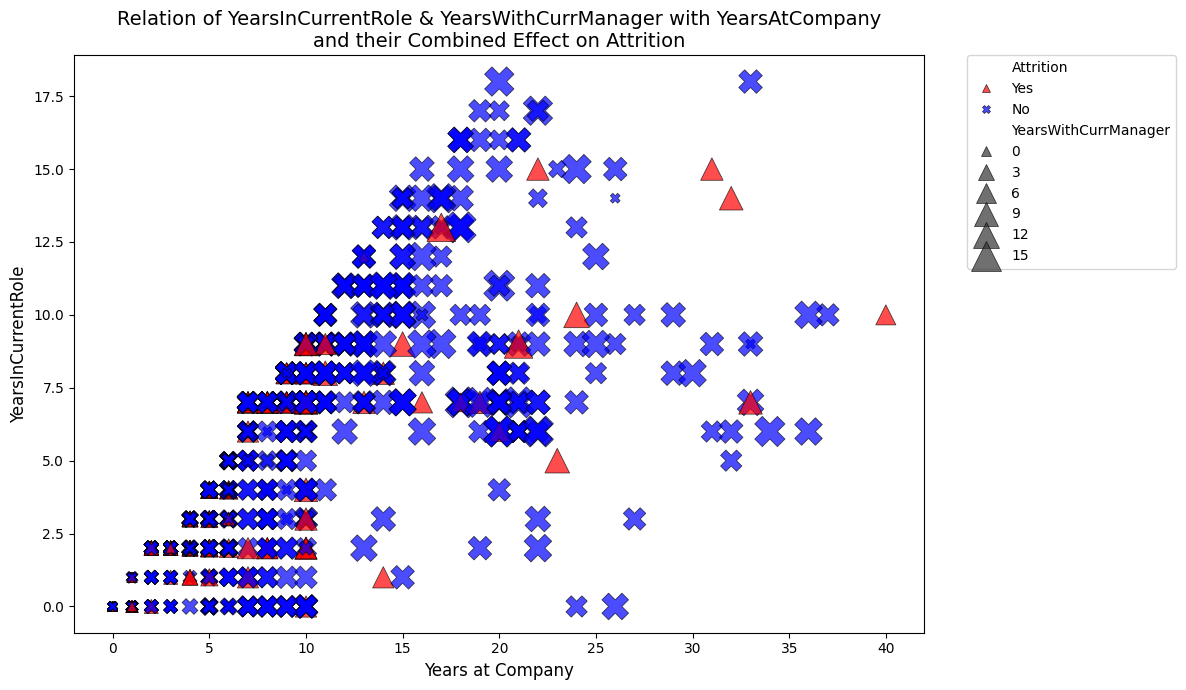

In [108]:
# --- Step 1: Check correlation with YearsAtCompany ---
corr = df_cleaned.corr(numeric_only=True)
corr_with_target = corr["YearsAtCompany"].sort_values(ascending=False)

print("Correlation of features with YearsAtCompany:")
print(corr_with_target)

# Pick the top 2 features (excluding YearsAtCompany itself)
top_features = corr_with_target.drop("YearsAtCompany").head(2).index.tolist()
print("\nTop 2 correlated features with YearsAtCompany:", top_features)

# --- Step 2: Visualization ---
plt.figure(figsize=(12, 7))

# Custom markers for Attrition
markers = {"Yes": "^", "No": "X"}

# Scatter plot
sns.scatterplot(
    data=df,
    x="YearsAtCompany",
    y=top_features[1],  # YearsInCurrentRole
    size=top_features[0],  # YearsWithCurrManager
    hue="Attrition",
    style="Attrition",
    markers=markers,
    palette={"Yes": "red", "No": "blue"},
    sizes=(50, 500),
    alpha=0.7,
    edgecolor="black"
)

# Labels & Title
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel(top_features[1], fontsize=12)
plt.title(
    f"Relation of {top_features[1]} & {top_features[0]} with YearsAtCompany\n"
    "and their Combined Effect on Attrition",
    fontsize=14
)

# Legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

<section>
<h4>Findings from Visual</h4>
<ul>
<li>The features YearsWithCurrManager and YearsInCurrentRole are strongly correlated with YearsAtCompany. </li>
<li>Together, they reveal that attrition risk is concentrated among employees with short tenure, less time in role, and weaker manager relationships</li>
</ul>
<h4>Pre-Attentive features used</h4>
<ul>
<li>Shape</li>
<li>Colour</li>
</ul>

</section>

Top correlated features: YearsInCurrentRole, TotalWorkingYears


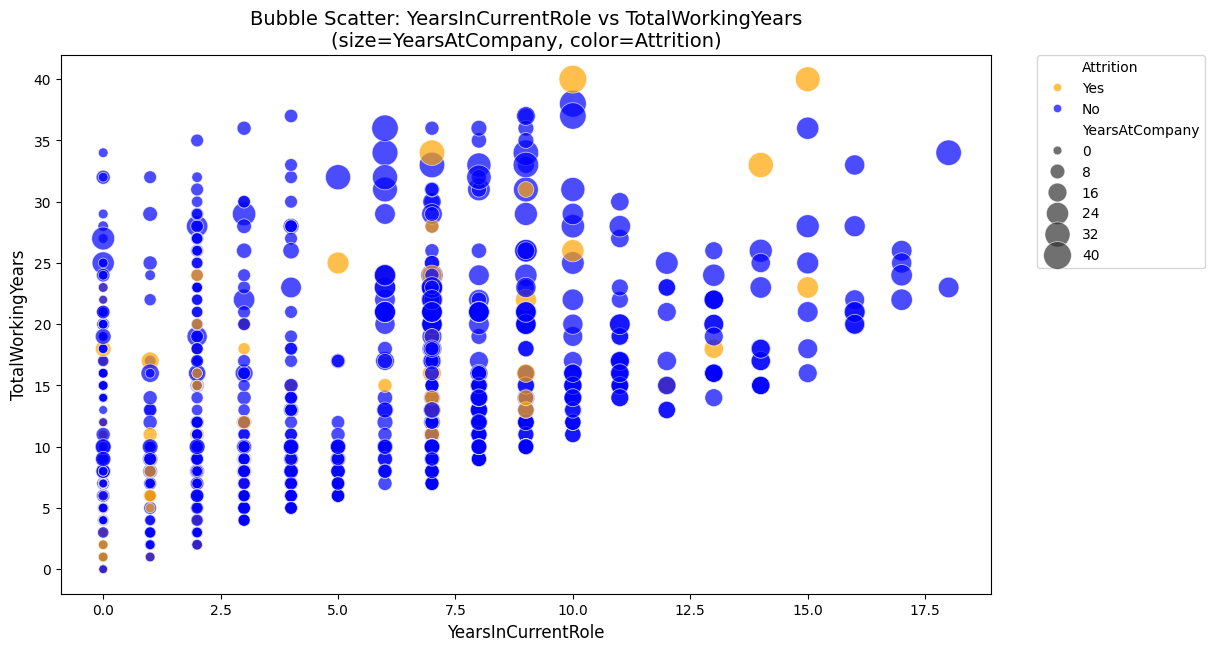

In [ ]:
# # Step 1: Top correlated features
# num_cols = df_cleaned.select_dtypes(include=['int64']).columns
# corr_matrix = df_cleaned[num_cols].corr().abs()

# top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()


# feat2, feat1 = ('TotalWorkingYears', 'YearsInCurrentRole')
# print(f"Top correlated features: {feat1}, {feat2}")

# from matplotlib.lines import Line2D
# plt.figure(figsize=(12,7))


# sns.scatterplot(
#     data=df,
#     x=feat1,
#     y=feat2,
#     hue="Attrition",
#     size="YearsAtCompany",
#     sizes=(40, 400),
#     alpha=0.7,
#     palette={"Yes":"orange", "No":"blue"}
# )

# plt.title(f"Bubble Scatter: {feat1} vs {feat2}\n(size=YearsAtCompany, color=Attrition)", fontsize=14)
# plt.xlabel(feat1, fontsize=12)
# plt.ylabel(feat2, fontsize=12)

# # Set y-axis ticks at intervals of 2
# #plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))

# # Improved legend placement
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()
# # Marker mapping for Attrition
# # markers = {"Yes": "^", "No": "X"}

# # # Scatterplot with fixes
# # scatter = sns.scatterplot(
# #     data=df_cleaned,
# #     x=feat1, 
# #     y=feat2,
# #     style="Attrition",
# #     markers={"Yes": "^", "No": "X"},  # Yes=triangle, No=cross
# #     hue="YearsAtCompany",
# #     size="YearsAtCompany", 
# #     sizes=(80, 400),  # min and max marker size
# #     palette="viridis", 
# #     alpha=0.7,
# #     edgecolor="black", 
# #     linewidth=0.5
# # )

# # # Adjust y-axis ticks step=2
# # plt.yticks(range(0, df_cleaned[feat1].max()+2, 2))

# # # Titles
# # plt.title("Top 2 Correlated Features vs YearsAtCompany and Attrition", fontsize=14)
# # plt.xlabel(feat1, fontsize=12)
# # plt.ylabel(feat2, fontsize=12)

# # # Get handles and labels for seaborn legend
# # handles, labels = scatter.get_legend_handles_labels()

# # # Custom attrition legend
# # attrition_legend = [
# #     Line2D([0], [0], marker='^', color='w', markerfacecolor='grey', markeredgecolor='black',
# #            markersize=10, label="Attrition: Yes"),
# #     Line2D([0], [0], marker='X', color='w', markerfacecolor='grey', markeredgecolor='black',
# #            markersize=10, label="Attrition: No")
# # ]

# # # Place legends separately
# # plt.legend(handles=attrition_legend, title="Attrition", bbox_to_anchor=(1.02, 1), loc="upper left")

# # # Add colorbar for YearsAtCompany
# # norm = plt.Normalize(df_cleaned["YearsAtCompany"].min(), df_cleaned["YearsAtCompany"].max())
# # sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# # sm.set_array([])
# # cbar = plt.colorbar(sm, ax=plt.gca())
# # cbar.set_label("YearsAtCompany (Color)")

# # # Add size legend manually
# # for size in [5, 15, 30]:  # representative values
# #     plt.scatter([], [], c='grey', alpha=0.7, s=(size/df_cleaned["YearsAtCompany"].max())*400, 
# #                 label=f"{size} yrs", edgecolor="black")
# # plt.legend(title="YearsAtCompany (Size)", bbox_to_anchor=(1.02, 0.5), loc="center left")

# # plt.tight_layout()
# # plt.show()

# # markers = {"Yes": "^", "No": "X"}

# # # Step 2: Bubble scatter plot
# # plt.figure(figsize=(18,12))

# # # Use a high-contrast palette
# # sns.scatterplot(
# #     data=df_cleaned,
# #     x=feat1,
# #     y=feat2,
# #     hue="YearsAtCompany",         # Color by YearsAtCompany (continuous scale)
# #     size="YearsAtCompany",        # marker size also based on YearsAtCompany
# #     sizes=(50, 400),
# #     style="Attrition",          # different markers for Yes/No
# #     markers=markers,
# #     alpha=0.7,
# #     palette="viridis",  # better contrast,
# #     s=120
# # )

# # plt.title(f"Bubble Scatter: {feat1} vs {feat2}\n(color=YearsAtCompany, size=Attrition)", fontsize=14)
# # plt.xlabel(feat1, fontsize=12)
# # plt.ylabel(feat2, fontsize=12)

# # # Set y-axis ticks at intervals of 2
# # plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(5))

# # plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2000))
# # # Move legend outside and split into clear handles
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# # plt.show()

1. Findings:

The top correlated features are likely TotalWorkingYears and MonthlyIncome (you should confirm by running the code).

They show a positive linear relationship — more working years → higher income.

Employees with shorter tenure (smaller bubbles) and lower income tend to leave more (red points).

Employees with longer tenure (larger bubbles) and higher income show lower attrition.

2. Reason for chart choice:

Bubble scatter encodes 4 dimensions in a single 2D plot.

Easy to interpret and avoids complexity of 3D plots.

3. Pre-attentive attributes:

Color (Attrition Yes/No).

Size (YearsAtCompany).

4. Gestalt principles:

Similarity (same-colored points form groups → attrition vs no attrition).

Proximity (points close together show natural clusters).

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>